In [122]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html
import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [123]:
# block of code that will map the state names in the .txt to the appropriate abbreviations along
# the axes of our plots
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [124]:
us_abbrev_to_state = {v: k for k, v in us_state_to_abbrev.items()}

In [125]:
states_list = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [126]:
#read file in
data_frame = pd.read_csv("T43.6.txt",delimiter="\t")
pd.set_option('display.max_rows', None)

In [127]:
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame=data_frame.replace("Suppressed",np.nan)
# data pre-processing to ensure new .txt runs with code provided by paper
# want columns to be the same name, and ensure the data is read as the correct type
# also want the correct subset of data to be processed  by later code, this figure is only for males
data_frame = data_frame.rename(columns = {"Single Race 6": "Race", "Residence State": "State"})
data_frame =  data_frame[(data_frame["Notes"] != "Total") & (data_frame["Year Code"] >= 2019)]

data_frame.drop('Year', axis = 1, inplace = True)
data_frame['Year Code'] = data_frame['Year Code'].astype(int)
data_frame = data_frame.rename(columns = {"Year Code": "Year"})

In [128]:
#preview/tester code to gauge missingness of data
# my_df = data_frame.dropna(subset = ['Crude Rate'], inplace = False)
# my_df

In [129]:
# defining relevant subsets of data that will be pivoted later
# named as 2x_20xx to indicate what race and what year the dataframe refers to
CM2n_2020 = data_frame[(data_frame["Race"] == "American Indian or Alaska Native")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]
CM2a_2020 = data_frame[(data_frame["Race"] == "Asian")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]
CM2p_2020 = data_frame[(data_frame["Race"] == "Native Hawaiian or Other Pacific Islander")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]
CM2b_2020 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]
CM2w_2020 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2020)]
CM2n_2019 = data_frame[(data_frame["Race"] == "American Indian or Alaska Native")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2019)]
CM2a_2019 = data_frame[(data_frame["Race"] == "Asian or Pacific Islander")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2019)]
CM2b_2019 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2019)]
CM2w_2019 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2019)]
CM2p_2019 = data_frame[(data_frame["Race"] == "Native Hawaiian or Other Pacific Islander")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2019)]

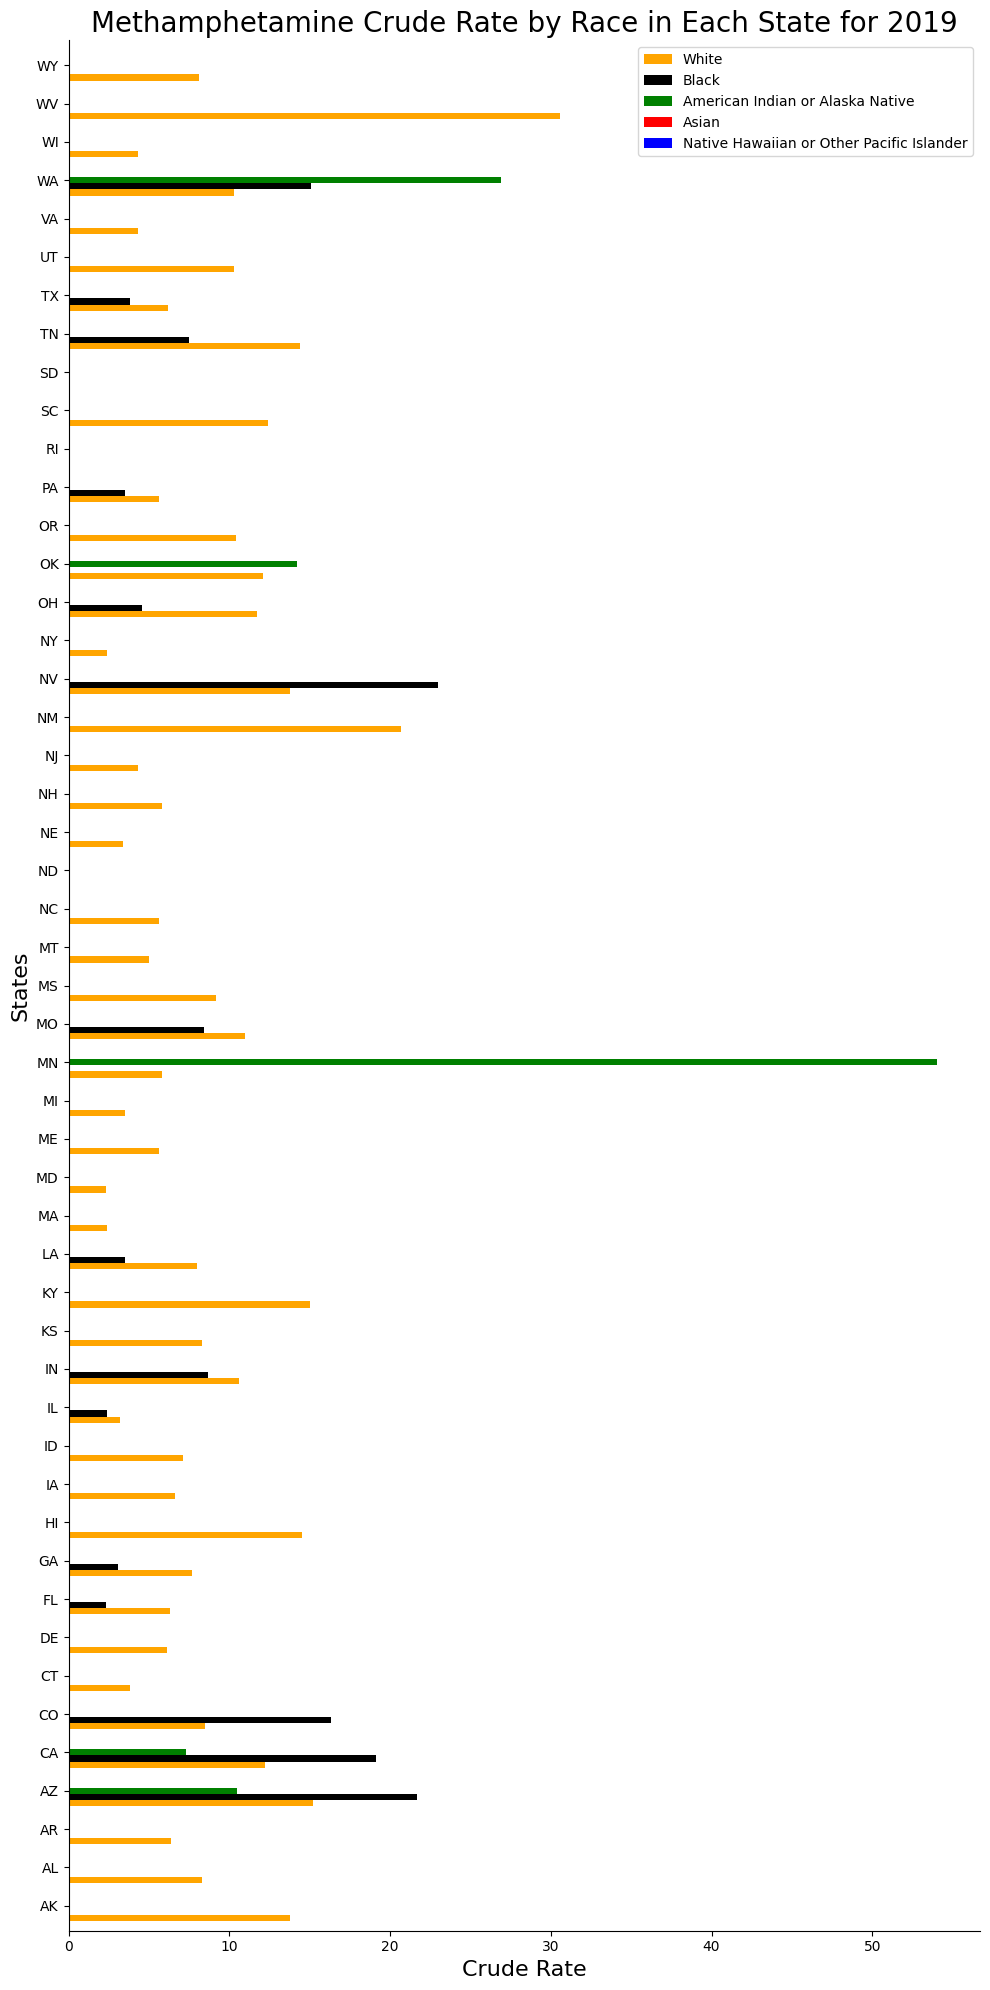

In [130]:
# pivoting columns, crude rate for the white group is labeled now as "white" and for the black group is labeled
# as "black" etc.
W19 = pd.DataFrame({"States": CM2w_2019["State"].astype(str), "White": CM2w_2019["Crude Rate"].astype(float)})
B19 = pd.DataFrame({"States": CM2b_2019["State"].astype(str), "Black": CM2b_2019["Crude Rate"].astype(float)})
A19 = pd.DataFrame({"States": CM2a_2019["State"].astype(str), "Asian": CM2a_2019["Crude Rate"].astype(float)})
P19 = pd.DataFrame({"States": CM2p_2019["State"].astype(str), "Native Hawaiian or Other Pacific Islander": CM2p_2019["Crude Rate"].astype(float)})
N19 = pd.DataFrame({"States": CM2n_2019["State"].astype(str), "American Indian or Alaska Native": CM2n_2019["Crude Rate"].astype(float)})

# mapping full state names to abbreviations
W19['States'] = W19['States'].map(us_state_to_abbrev)
B19['States'] = B19['States'].map(us_state_to_abbrev)
A19['States'] = A19['States'].map(us_state_to_abbrev)
P19['States'] = P19['States'].map(us_state_to_abbrev)
N19['States'] = N19['States'].map(us_state_to_abbrev)
#merge data sets with no loss
merged_df = pd.merge(W19, B19, on="States", how="outer")
merged_df = pd.merge(merged_df, N19, on="States", how="outer")
merged_df = pd.merge(merged_df, A19, on="States", how="outer")
merged_df = pd.merge(merged_df, P19, on="States", how="outer")
merged_df.set_index('States', inplace=True)

# plotting & formatting plot
ax = merged_df.plot(kind='barh', figsize=(10, 20), color={"White": "orange", "Black": "black", "Asian": "red", "American Indian or Alaska Native": "green", "Native Hawaiian or Other Pacific Islander": "blue"}, width=0.8)

plt.title('Methamphetamine Crude Rate by Race in Each State for 2019', fontsize=20)
plt.xlabel('Crude Rate', fontsize=16)
plt.ylabel('States', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.tight_layout()
plt.savefig('T43.6_2019_Race.png')
#this logic will be followed in the rest of the blocks plotting 2020 - 2023 crude rate

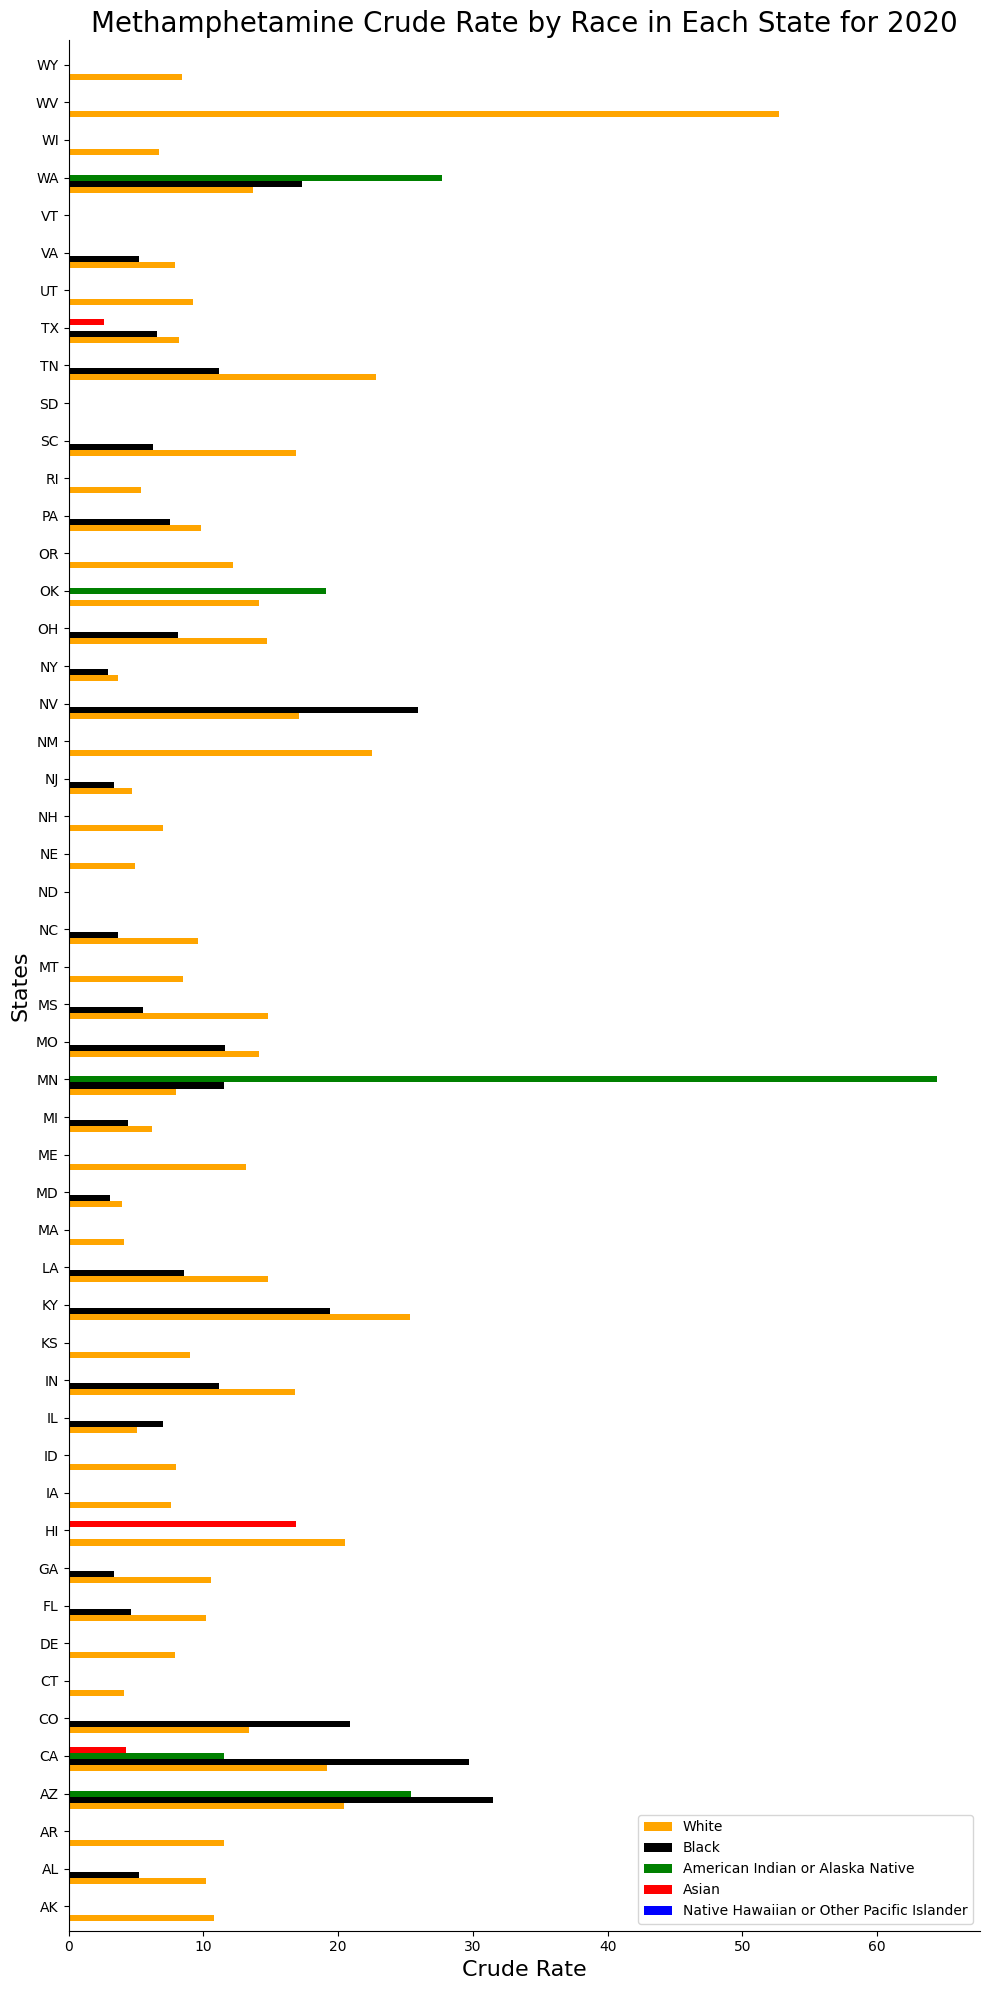

In [131]:
W20 = pd.DataFrame({"States": CM2w_2020["State"].astype(str), "White": CM2w_2020["Crude Rate"].astype(float)})
B20 = pd.DataFrame({"States": CM2b_2020["State"].astype(str), "Black": CM2b_2020["Crude Rate"].astype(float)})
A20 = pd.DataFrame({"States": CM2a_2020["State"].astype(str), "Asian": CM2a_2020["Crude Rate"].astype(float)})
P20 = pd.DataFrame({"States": CM2p_2020["State"].astype(str), "Native Hawaiian or Other Pacific Islander": CM2p_2020["Crude Rate"].astype(float)})
N20 = pd.DataFrame({"States": CM2n_2020["State"].astype(str), "American Indian or Alaska Native": CM2n_2020["Crude Rate"].astype(float)})

W20['States'] = W20['States'].map(us_state_to_abbrev)
B20['States'] = B20['States'].map(us_state_to_abbrev)
A20['States'] = A20['States'].map(us_state_to_abbrev)
P20['States'] = P20['States'].map(us_state_to_abbrev)
N20['States'] = N20['States'].map(us_state_to_abbrev)

merged_df = pd.merge(W20, B20, on="States", how="outer")
merged_df = pd.merge(merged_df, N20, on="States", how="outer")
merged_df = pd.merge(merged_df, A20, on="States", how="outer")
merged_df = pd.merge(merged_df, P20, on="States", how="outer")
merged_df.set_index('States', inplace=True)

ax = merged_df.plot(kind='barh', figsize=(10, 20), color={"White": "orange", "Black": "black", "Asian": "red", "American Indian or Alaska Native": "green", "Native Hawaiian or Other Pacific Islander": "blue"}, width=0.8)

plt.title('Methamphetamine Crude Rate by Race in Each State for 2020', fontsize=20)
plt.xlabel('Crude Rate', fontsize=16)
plt.ylabel('States', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.tight_layout()
plt.savefig('T43.6_2020_Race.png')



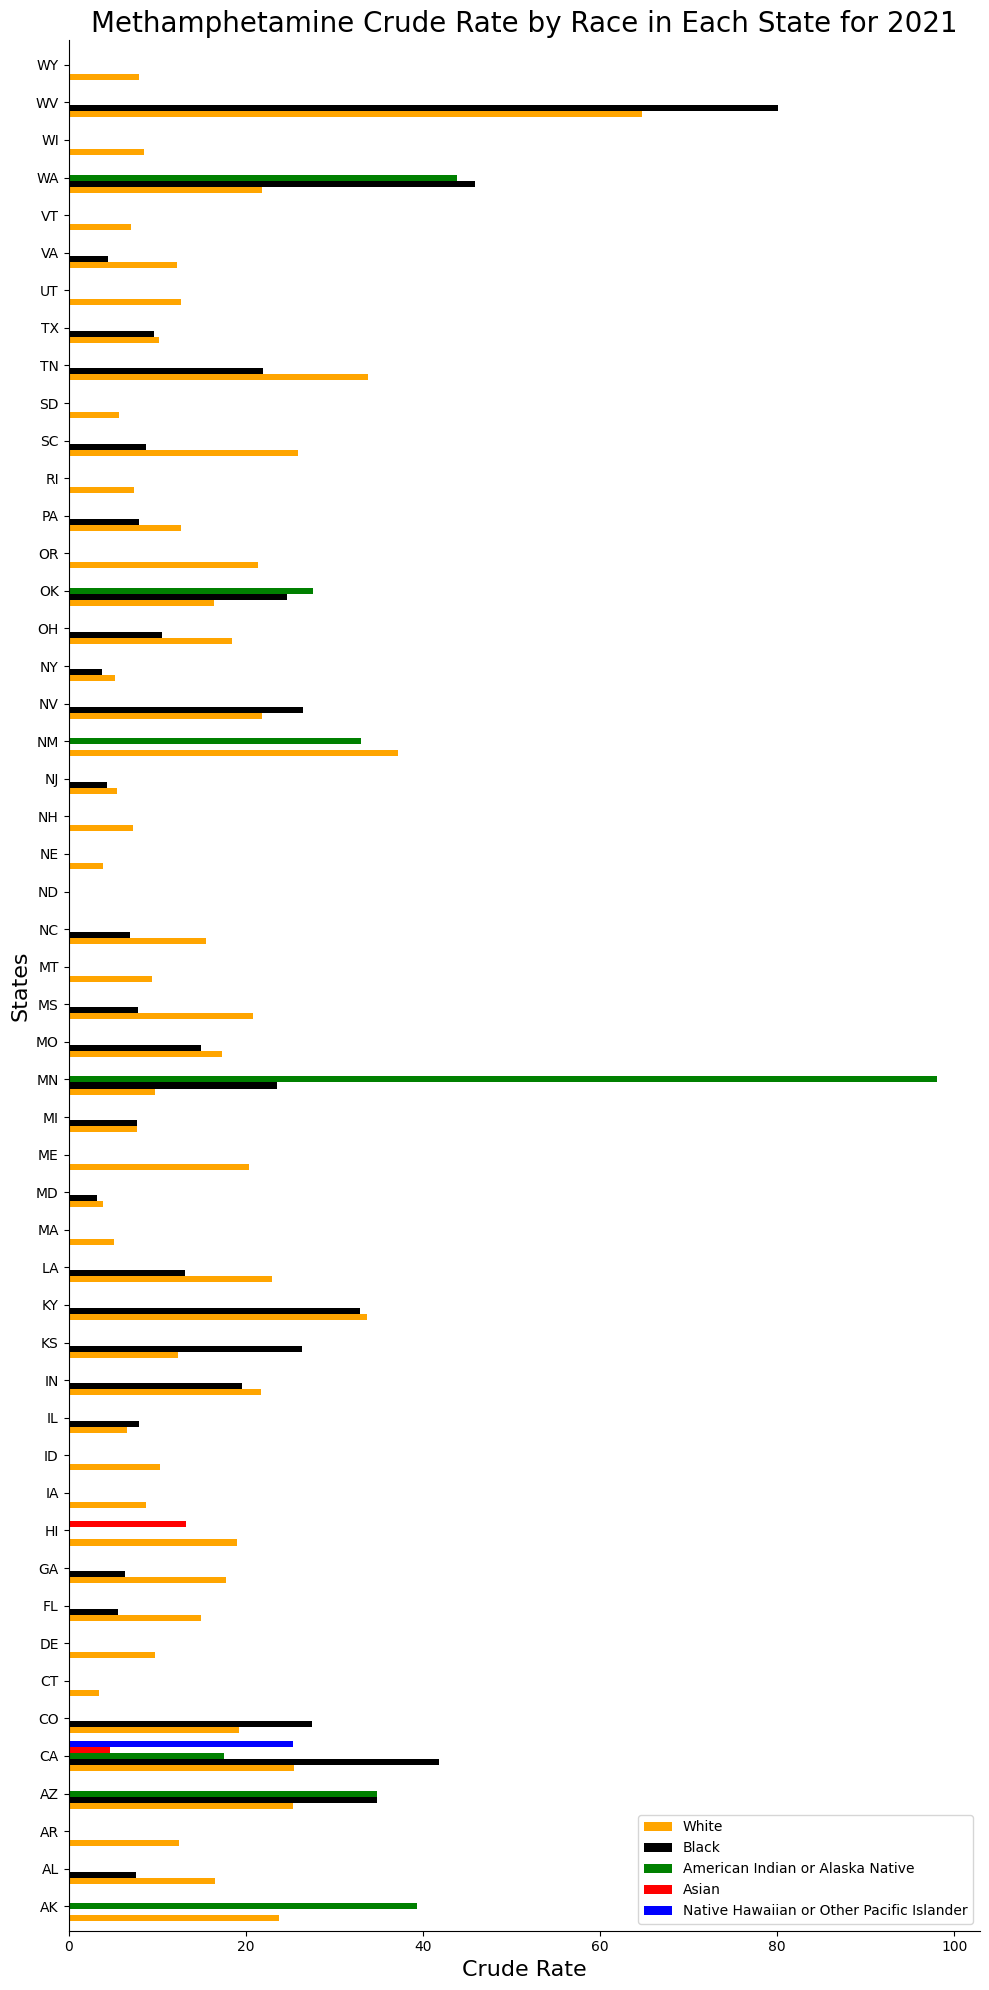

In [132]:
CM2n_2021 = data_frame[(data_frame["Race"] == "American Indian or Alaska Native")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2021)]
CM2a_2021 = data_frame[(data_frame["Race"] == "Asian")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2021)]
CM2b_2021 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2021)]
CM2w_2021 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2021)]
CM2p_2021 = data_frame[(data_frame["Race"] == "Native Hawaiian or Other Pacific Islander")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2021)]

W21 = pd.DataFrame({"States": CM2w_2021["State"].astype(str), "White": CM2w_2021["Crude Rate"].astype(float)})
B21 = pd.DataFrame({"States": CM2b_2021["State"].astype(str), "Black": CM2b_2021["Crude Rate"].astype(float)})
A21 = pd.DataFrame({"States": CM2a_2021["State"].astype(str), "Asian": CM2a_2021["Crude Rate"].astype(float)})
P21 = pd.DataFrame({"States": CM2p_2021["State"].astype(str), "Native Hawaiian or Other Pacific Islander": CM2p_2021["Crude Rate"].astype(float)})
N21 = pd.DataFrame({"States": CM2n_2021["State"].astype(str), "American Indian or Alaska Native": CM2n_2021["Crude Rate"].astype(float)})

W21['States'] = W21['States'].map(us_state_to_abbrev)
B21['States'] = B21['States'].map(us_state_to_abbrev)
A21['States'] = A21['States'].map(us_state_to_abbrev)
P21['States'] = P21['States'].map(us_state_to_abbrev)
N21['States'] = N21['States'].map(us_state_to_abbrev)

merged_df = pd.merge(W21, B21, on="States", how="outer")
merged_df = pd.merge(merged_df, N21, on="States", how="outer")
merged_df = pd.merge(merged_df, A21, on="States", how="outer")
merged_df = pd.merge(merged_df, P21, on="States", how="outer")
merged_df.set_index('States', inplace=True)

ax = merged_df.plot(kind='barh', figsize=(10, 20), color={"White": "orange", "Black": "black", "Asian": "red", "American Indian or Alaska Native": "green", "Native Hawaiian or Other Pacific Islander": "blue"}, width=0.8)

plt.title('Methamphetamine Crude Rate by Race in Each State for 2021', fontsize=20)
plt.xlabel('Crude Rate', fontsize=16)
plt.ylabel('States', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.tight_layout()
plt.savefig('T43.6_2021_Race.png')



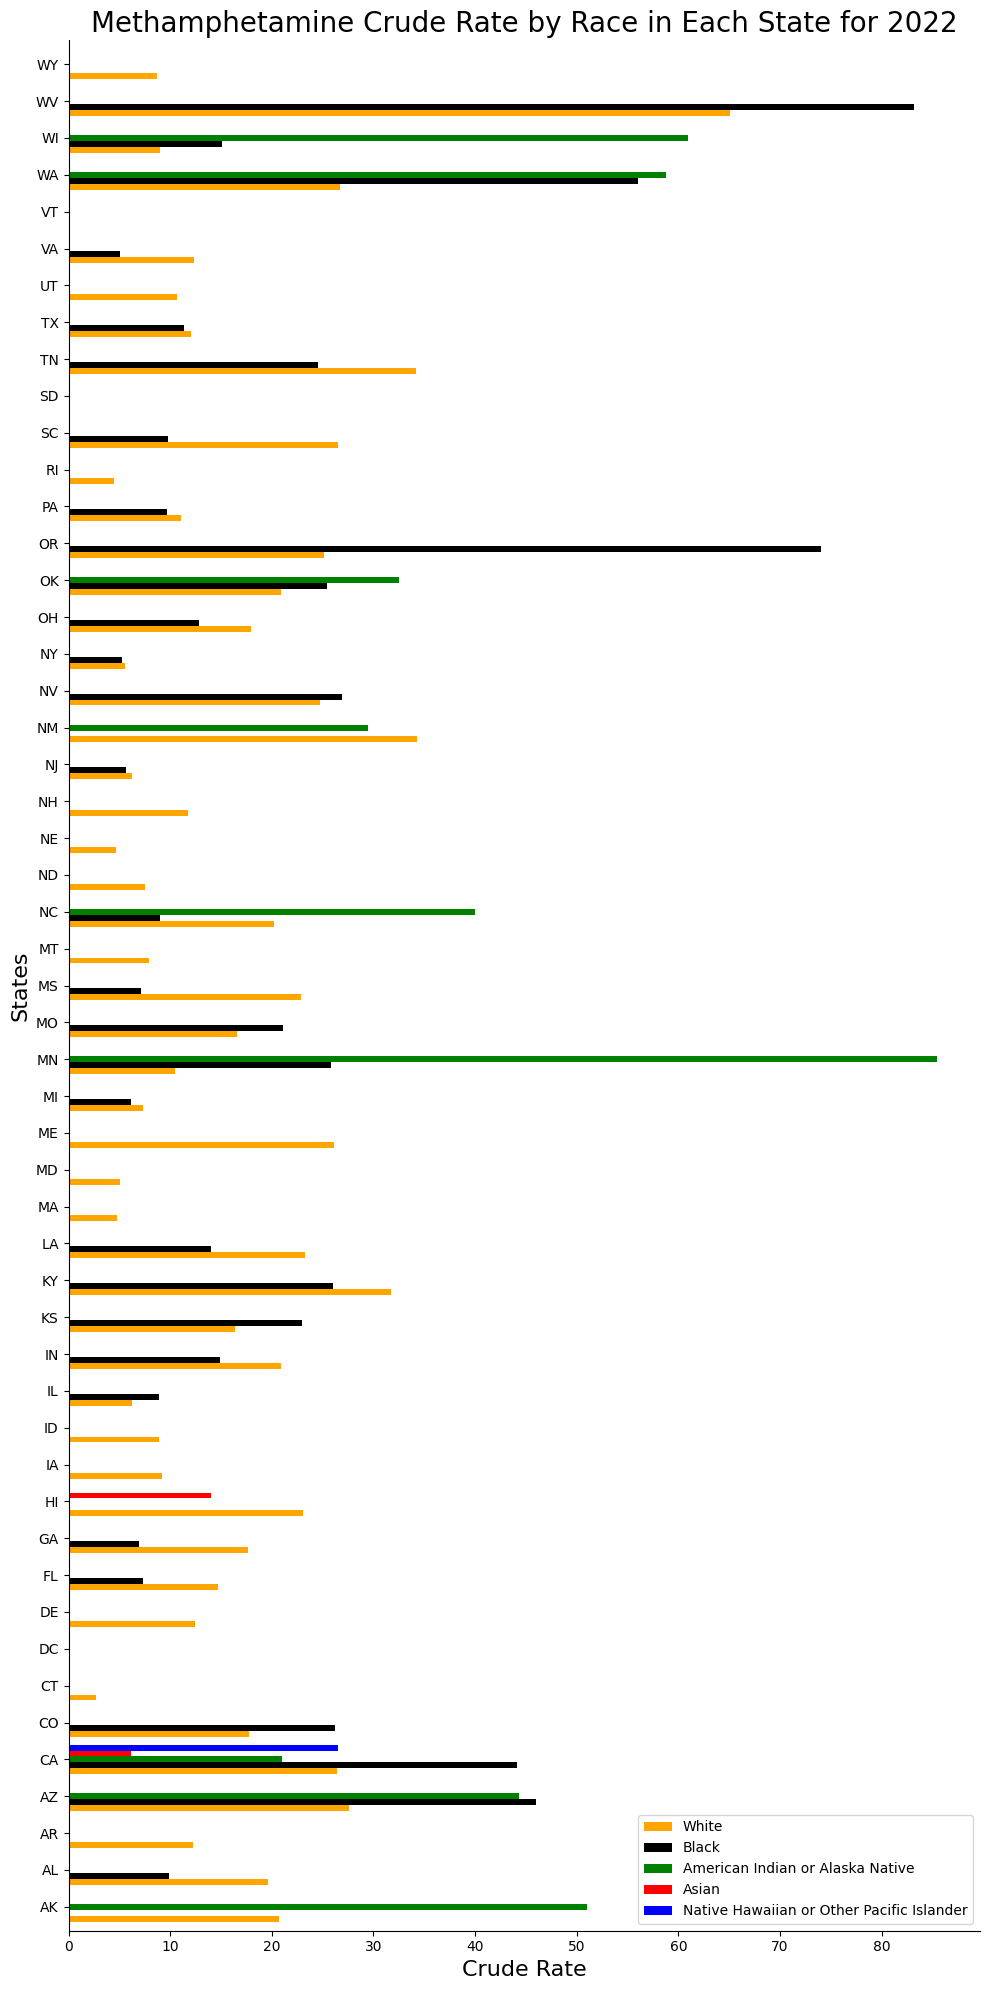

In [133]:
CM2n_2022 = data_frame[(data_frame["Race"] == "American Indian or Alaska Native")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2022)]
CM2a_2022 = data_frame[(data_frame["Race"] == "Asian")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2022)]
CM2b_2022 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2022)]
CM2w_2022 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2022)]
CM2p_2022 = data_frame[(data_frame["Race"] == "Native Hawaiian or Other Pacific Islander")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2022)]


W22 = pd.DataFrame({"States": CM2w_2022["State"].astype(str), "White": CM2w_2022["Crude Rate"].astype(float)})
B22 = pd.DataFrame({"States": CM2b_2022["State"].astype(str), "Black": CM2b_2022["Crude Rate"].astype(float)})
A22 = pd.DataFrame({"States": CM2a_2022["State"].astype(str), "Asian": CM2a_2022["Crude Rate"].astype(float)})
P22 = pd.DataFrame({"States": CM2p_2022["State"].astype(str), "Native Hawaiian or Other Pacific Islander": CM2p_2022["Crude Rate"].astype(float)})
N22 = pd.DataFrame({"States": CM2n_2022["State"].astype(str), "American Indian or Alaska Native": CM2n_2022["Crude Rate"].astype(float)})

W22['States'] = W22['States'].map(us_state_to_abbrev)
B22['States'] = B22['States'].map(us_state_to_abbrev)
A22['States'] = A22['States'].map(us_state_to_abbrev)
P22['States'] = P22['States'].map(us_state_to_abbrev)
N22['States'] = N22['States'].map(us_state_to_abbrev)

merged_df = pd.merge(W22, B22, on="States", how="outer")
merged_df = pd.merge(merged_df, N22, on="States", how="outer")
merged_df = pd.merge(merged_df, A22, on="States", how="outer")
merged_df = pd.merge(merged_df, P22, on="States", how="outer")
merged_df.set_index('States', inplace=True)

ax = merged_df.plot(kind='barh', figsize=(10, 20), color={"White": "orange", "Black": "black", "Asian": "red", "American Indian or Alaska Native": "green", "Native Hawaiian or Other Pacific Islander": "blue"}, width=0.8)

plt.title('Methamphetamine Crude Rate by Race in Each State for 2022', fontsize=20)
plt.xlabel('Crude Rate', fontsize=16)
plt.ylabel('States', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.tight_layout()
plt.savefig('T43.6_2022_Race.png')



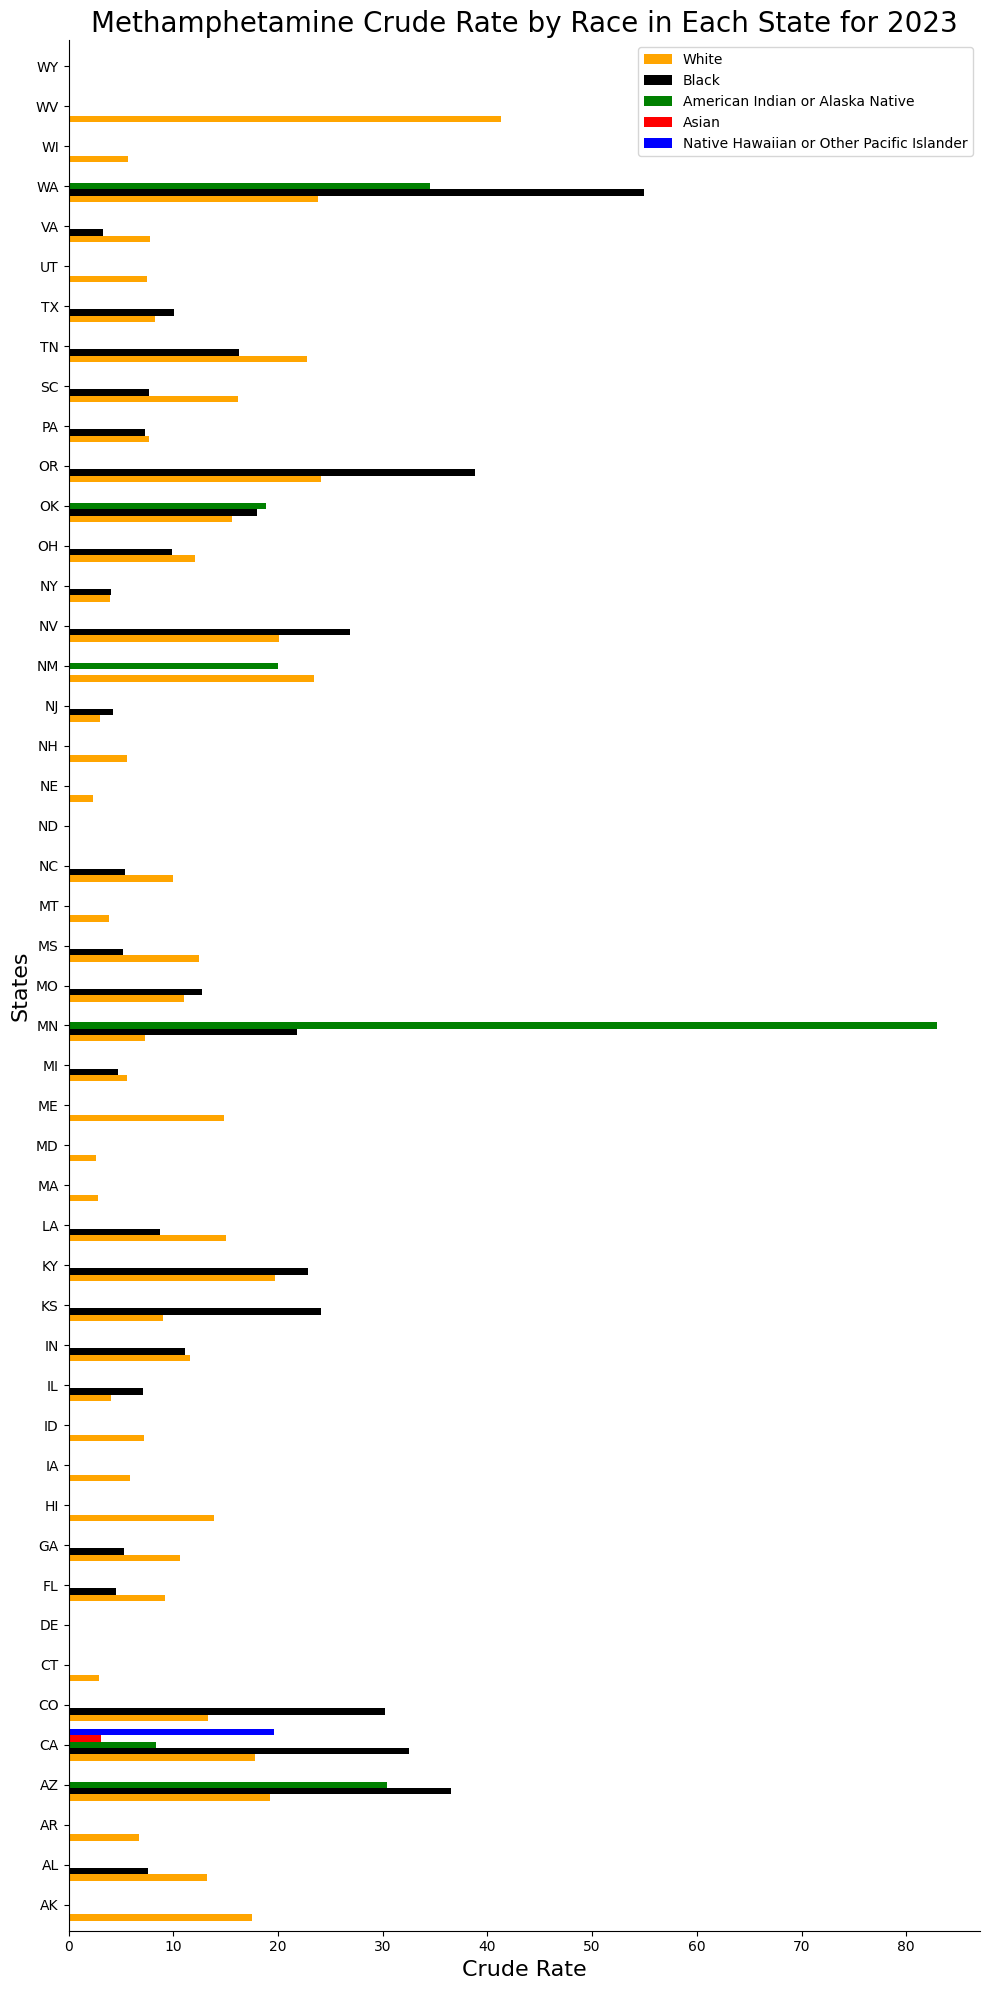

In [134]:
CM2n_2023 = data_frame[(data_frame["Race"] == "American Indian or Alaska Native")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2023)]
CM2a_2023 = data_frame[(data_frame["Race"] == "Asian")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2023)]
CM2b_2023 = data_frame[(data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2023)]
CM2w_2023 = data_frame[(data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2023)]
CM2p_2023 = data_frame[(data_frame["Race"] == "Native Hawaiian or Other Pacific Islander")& 
           (data_frame["Notes"] != "Total") & (data_frame["Year"] == 2023)]

W23 = pd.DataFrame({"States": CM2w_2023["State"].astype(str), "White": CM2w_2023["Crude Rate"].astype(float)})
B23 = pd.DataFrame({"States": CM2b_2023["State"].astype(str), "Black": CM2b_2023["Crude Rate"].astype(float)})
A23 = pd.DataFrame({"States": CM2a_2023["State"].astype(str), "Asian": CM2a_2023["Crude Rate"].astype(float)})
P23 = pd.DataFrame({"States": CM2p_2023["State"].astype(str), "Native Hawaiian or Other Pacific Islander": CM2p_2023["Crude Rate"].astype(float)})
N23 = pd.DataFrame({"States": CM2n_2023["State"].astype(str), "American Indian or Alaska Native": CM2n_2023["Crude Rate"].astype(float)})

W23['States'] = W23['States'].map(us_state_to_abbrev)
B23['States'] = B23['States'].map(us_state_to_abbrev)
A23['States'] = A23['States'].map(us_state_to_abbrev)
P23['States'] = P23['States'].map(us_state_to_abbrev)
N23['States'] = N23['States'].map(us_state_to_abbrev)

merged_df = pd.merge(W23, B23, on="States", how="outer")
merged_df = pd.merge(merged_df, N23, on="States", how="outer")
merged_df = pd.merge(merged_df, A23, on="States", how="outer")
merged_df = pd.merge(merged_df, P23, on="States", how="outer")
merged_df.set_index('States', inplace=True)

ax = merged_df.plot(kind='barh', figsize=(10, 20), color={"White": "orange", "Black": "black", "Asian": "red", "American Indian or Alaska Native": "green", "Native Hawaiian or Other Pacific Islander": "blue"}, width=0.8)

plt.title('Methamphetamine Crude Rate by Race in Each State for 2023', fontsize=20)
plt.xlabel('Crude Rate', fontsize=16)
plt.ylabel('States', fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.tight_layout()
plt.savefig('T43.6_2023_Race.png')

